In [1]:
import numpy, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

In [2]:
def kernels(x, y, fun='linear', paras=1):
    if len(x)!=len(y):
        print('2 objects should be have same length!')
        return 0
    if fun=='poly':
        return (numpy.dot(x,y)+1)**paras
    if fun=='RBF':
        return numpy.exp(-numpy.dot(x-y,x-y)/(2*paras*paras))
    return numpy.dot(x,y)

In [3]:
def objective(alpha):
    # alpha is 1xn array or list
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, numpy.dot(alpha, P))/2 - numpy.sum(alpha)

In [4]:
def zerofun(alpha):
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, targets)

In [5]:
def extract_nonzeros():
    if C==None:
        return [inputs[(alpha>10**(-5)),:], 
                targets[(alpha>10**(-5))], 
                alpha[(alpha>10**(-5))]]
    else:
        return [inputs[(alpha>10**(-5))&(alpha<C-10**(-5)),:], 
                targets[(alpha>10**(-5))&(alpha<C-10**(-5))], 
                alpha[(alpha>10**(-5))&(alpha<C-10**(-5))]]

In [6]:
def find_b(index_sv):
    return numpy.dot(alpha*targets, 
              numpy.array([kernels(sv[0][index_sv,:],xi,fun,paras) for xi in inputs])) - sv[1][index_sv]

In [7]:
def indicator(s):
    return numpy.dot(alpha*targets, numpy.array([kernels(s,xi,fun,paras) for xi in inputs])) - b

In [193]:
# Generate Test Data
def dataset0(n1=10, n2=10, n3=10, pos1=[1.5,0.5], pos2=[-1.5,0.5], pos3=[0.0,-0.5], var1=0.2, var2=0.2, var3=0.2):
    classA = numpy.concatenate((numpy.random.randn(n1, 2) * var1 + pos1,
                               numpy.random.randn(n2, 2) * var2 + pos2))
    classB = numpy.random.randn(n3, 2) * var3 + pos3

    inputs = numpy.concatenate((classA, classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

    N = inputs.shape[0]

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    return inputs, targets, classA, classB

In [260]:
def datasetMoon(random_state=0):
    inputs, targets = make_moons(n_samples=100, noise=0.1)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [167]:
def datasetCircle():
    inputs, targets = make_circles(n_samples=100, factor=0.5, noise=0.05)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [253]:
def datasetClass():
    inputs, targets = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                        n_informative=2, random_state=2,
                                        n_clusters_per_class=1)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [44]:
def datasetBlobs():
    inputs, targets = make_blobs(n_samples=100, centers=[(-2.0, -2.0), (2.0, 2.0)], n_features=2)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [14]:
def datasetFlame():
    d = numpy.loadtxt('flame.txt')
    inputs = d[:,[0,1]]/10 - [0.7, 2.0]
    targets = d[:, 2]
    
    classA = inputs[targets==1,:]
    classB = inputs[targets==2,:]
    
    targets[targets==2] = -1
    
    return inputs, targets, classA, classB

In [8]:
def datasetSpiral():
    d = numpy.loadtxt('spiral.txt')
    
    targets = d[:, 2]
    inputs = d[targets<3,:]
    targets = targets[targets<3]
    inputs = inputs[:,[0,1]]/10-[2.0,2.0]
    
    classA = inputs[targets==1,:]
    classB = inputs[targets==2,:]
    
    targets[targets==2] = -1
    
    return inputs, targets, classA, classB

In [114]:
def datasetPathbased():
    d = numpy.loadtxt('pathbased.txt')
    
    targets = d[:, 2]
    inputs = d[:,[0,1]]
    
    targets[targets==2] = -1
    targets[targets==3] = -1
    
    classA = inputs[targets==1,:]
    classB = inputs[targets==-1,:]
    
    return inputs, targets, classA, classB

In [9]:
def plotData(datasetName, axis='equal'):
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

    plt.axis(axis)
    name = 'svmplot_' + datasetName + '.pdf'
    plt.savefig(name)
    plt.show()

In [10]:
def plotClassifier(datasetName, kernelName, kernelPar, valueC, axis, rep=50):
    xgrid = numpy.linspace(axis[0], axis[1], rep)
    ygrid = numpy.linspace(axis[2], axis[3], rep)

    grid = numpy.array([[indicator([x, y]) for x in xgrid] for y in ygrid])

    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
    name = 'svmclass_' + datasetName + '_kernelName' + str(kernelPar) + '_C' + str(valueC) + '.pdf'
    plt.savefig(name)
    plt.show()

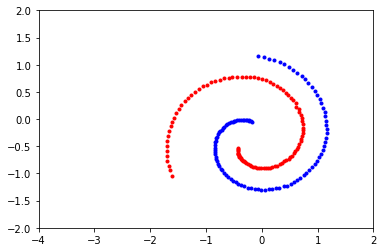

[9.95346257 1.51630395 0.0400989  5.02406945 1.08348167 0.91713548
 4.99583899 9.53747873]


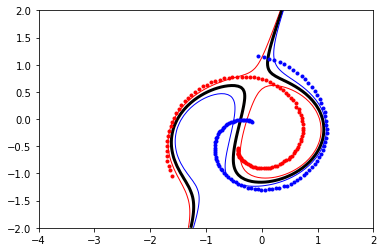

In [12]:
# Test for spiral data
numpy.random.seed(100)
inputs, targets, classA, classB = datasetSpiral()

datasetName = 'spiral'
axis = [-4.0, 2.0, -2.0, 2.0]
plotData(datasetName, axis)

# SVM implement
fun = 'poly'
paras = 3
C = 10
N = inputs.shape[0]
K = numpy.array([[kernels(xi, xj, fun, paras) for xi in inputs] for xj in inputs])

P = numpy.outer(targets,targets)*K

ret = minimize(objective, numpy.zeros(N), bounds=[(0,C) for b in range(N)], 
               constraints={'type':'eq', 'fun':zerofun})
alpha = ret['x']  # alpha get from minimize strictly set C if is is over C

sv = extract_nonzeros()

print(sv[2])
isv = 0
b = find_b(isv)

# test classification by plotting the decision doundary
plotClassifier(datasetName, fun, paras, C, axis, rep=100)

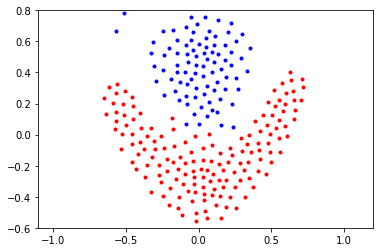

[   47.27998318   530.94625575  6650.71968844 10611.87101198
  2552.0418356   6029.5268869 ]


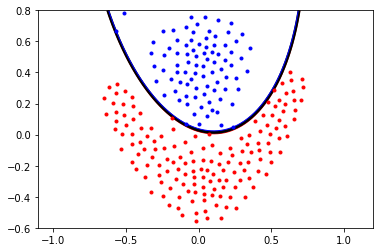

[ 3.99076228 53.45251244 71.89252008 21.69083237 40.11209604  3.9720182 ]


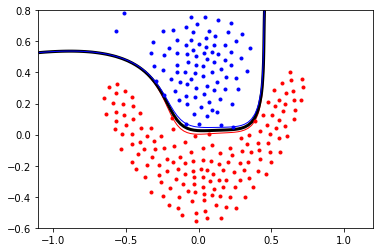

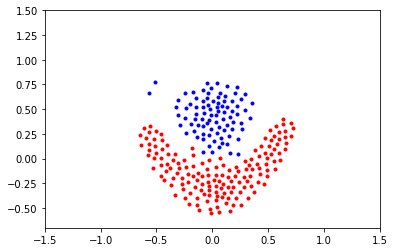

[  151.71332594  1067.75382626  7657.09587864 11003.65301209
  3923.56418991  6354.08081814]


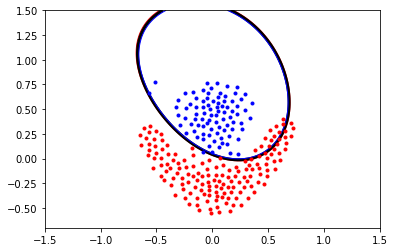

[0.83956524 0.83581355 0.27775334 0.17779253 0.20126394 0.31492227
 0.47554049 0.32543122 0.30615959 0.39947595 0.21908924 0.40960768
 0.11829808 0.02048805 0.32569253 0.02305417 0.49294065 0.25736583
 0.33206659 0.25640002 0.02791637 0.09903025 0.18029824 0.16427887
 0.42001293 0.44116272 0.04868535 0.05372513 0.11363103 0.07439667
 0.21769336 0.01196378 0.28856746 0.20627191 0.23908388 0.10947904
 0.47465294 0.42400818 2.3972206  0.2517318  0.77751811 0.2638404
 0.38771913 0.40464664 0.33070143 0.3052797  0.38789669 1.56436288
 3.17340644 4.25670309 1.78170859 0.3874007  3.03098548 3.95839902
 0.84082621 1.64470319 0.71154622 0.43517188 0.077213   0.18003821
 0.27227069 0.6339838  0.00848459 0.48904081 0.53712463 0.02940488
 0.79899411 0.05818488 0.7397747  0.36314345 0.21191524 0.7169614
 0.20325654 0.7546804  0.09622469 0.13923832 0.10553405 0.391769
 0.29767446 0.1717388  0.09343286 0.28206789 0.1459735  0.16837406]


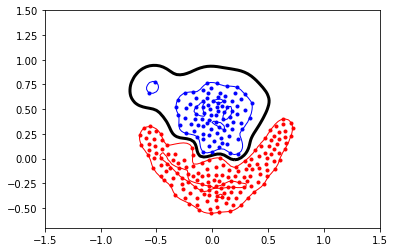

In [16]:
# Test for flame data
numpy.random.seed(100)
inputs, targets, classA, classB = datasetFlame()

datasetName = 'flame'
axis = [[-1.1, 1.2, -0.6, 0.8], [-1.5, 1.5, -0.7, 1.5]]

# SVM implement
funs = ['poly', 'RBF']
parameters = [[2, 20], [1, 0.1]]
C = None
N = inputs.shape[0]

for i,fun in enumerate(funs):
    plotData(datasetName, axis[i])
    for paras in parameters[i]:
        K = numpy.array([[kernels(xi, xj, fun, paras) for xi in inputs] for xj in inputs])

        P = numpy.outer(targets,targets)*K

        ret = minimize(objective, numpy.zeros(N), bounds=[(0,C) for b in range(N)], 
                       constraints={'type':'eq', 'fun':zerofun})
        alpha = ret['x']  # alpha get from minimize strictly set C if is is over C

        sv = extract_nonzeros()

        print(sv[2])
        isv = 0
        b = find_b(isv)

        # test classification by plotting the decision doundary
        plotClassifier(datasetName, fun, paras, C, axis[i], rep=100)